In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [43]:
Iris = data[['sepal length (cm)', 'sepal width (cm)']]

In [86]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Iris, variety, test_size=0.25)

In [87]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [88]:
lda = LinearDiscriminantAnalysis()

In [89]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [90]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2])

In [91]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,2
1,1,2
2,0,0
3,0,0
4,0,0
5,2,2
6,2,2
7,0,0
8,1,2
9,2,2


In [92]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(y_test, lda.predict(X_test))
#Прогноз верен на 76%

0.7631578947368421

In [95]:
lda.coef_

array([[-5.81110591,  8.91300536],
       [ 1.40143768, -3.56018622],
       [ 3.91401677, -4.55547171]])

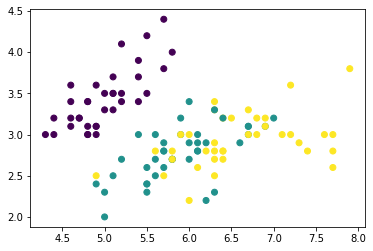

In [96]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [97]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

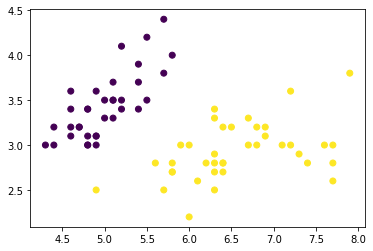

In [98]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [99]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [102]:
# посмотрим на наши центроиды
lda_small.means_

array([[4.99714286, 3.43714286],
       [6.56052632, 2.92631579]])

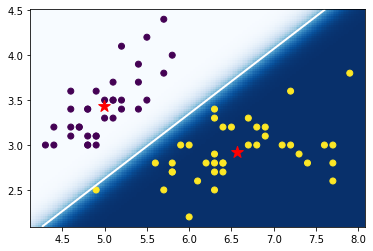

In [103]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='Blues',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [104]:
# первый признак(sepal length) в 21 раз важнее второго(sepal width) для кластеризации (это видно по визуализации)
lda_small.coef_

array([[  8.8440287, -12.2444462]])

Кластеризация

Предоставленные данные оптимально можно разделить на 3 кластера
Что подтверждается визуализациями ниже.

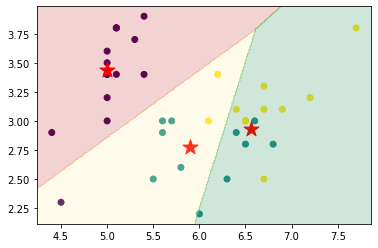

In [107]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1],  c='r', s=250, marker='*')
nx, ny = 300, 300
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.2)

In [117]:
from sklearn.preprocessing import StandardScaler

In [124]:
X_train, X_test, y_train, y_test = train_test_split(Iris, variety, test_size=0.25)

In [120]:
scaler = StandardScaler()

In [125]:
X_scaled = scaler.fit_transform(X_train)

In [126]:
from sklearn.cluster import KMeans

In [127]:
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1,
       1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1,
       2, 0, 1, 2, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0,
       0, 2], dtype=int32)

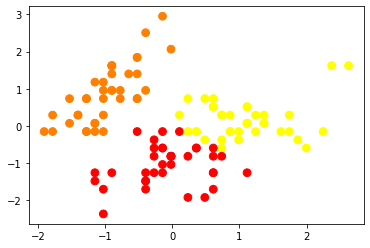

In [128]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [129]:

k_inertia = []
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

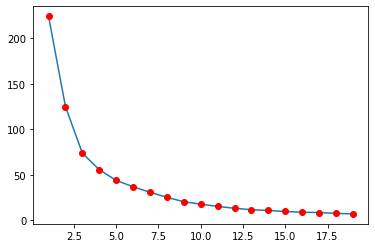

In [130]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')